# Solar single photon source

* What photon rate ($\dot{N}$) do we see from solar irradiation?
* Is it possible to bandpass solar irradiation to such a degree to achieve similar specifications (i.e. $\dot{N} = 1~{\rm MHz} \equiv 1~{\rm photon / } \mu{\rm s}$) to a single photon source?
* What is the best wavelength to do this at?

## Theory

\begin{align}
    I &= \frac{P}{A} \\
    A &= \frac{\pi d^2}{4} \\
    P &= \frac{E}{t} = \frac{Nhc}{\lambda t} = \frac{\dot{N}hc}{\lambda}\\[2em]
    \therefore~I &= \frac{4 \dot{N}hc}{\pi d^2 \lambda} \\
    \therefore~\dot{N} &= \frac{I \pi d^2 \lambda}{4hc}
\end{align}

The solar irradiance spectrum is typically referred to as _Air Mass 1.5_, or _AM1.5_,  which is available online (data taken from [here](https://rredc.nrel.gov/solar//spectra/am1.5/)).

\begin{align}
    \dot{N}(\lambda) &= \frac{\pi d^2}{4hc} I(\lambda) \lambda 
\end{align}

Taking the photon rate from within a given bandpass filter (centre wavelength $\lambda_0$, FWHM $\Delta\lambda$):

\begin{align}
    \dot{N}_{\Delta\lambda}  &= 
    \frac{\pi d^2}{4hc} 
    \int_{\lambda_0 - \frac{\Delta\lambda}{2}}^{\lambda_0 + \frac{\Delta\lambda}{2}} 
    I(\lambda) \lambda \partial\lambda
\end{align}

Assuming that $I(\lambda)\approx{\rm const.}$ over the range $\Delta\lambda$:

\begin{align}
    \dot{N} &= \frac{\pi d^2}{4hc} 
    \int_{\lambda_0 - \frac{\Delta\lambda}{2}}^{\lambda_0 + \frac{\Delta\lambda}{2}} 
    I(\lambda) \lambda \partial\lambda \\
    &\approx \frac{I_0 \pi d^2}{4hc} 
    \int_{\lambda_0 - \frac{\Delta\lambda}{2}}^{\lambda_0 + \frac{\Delta\lambda}{2}} 
    \lambda \partial\lambda \\
    &= \frac{I_0 \pi d^2}{4hc} 
    \left[ \frac{\lambda^2}{2} \right]_{\lambda_0 - \frac{\Delta\lambda}{2}}^{\lambda_0 + \frac{\Delta\lambda}{2}} \\
    &\vdots \\
    &= \frac{I_0 \lambda_0 \Delta\lambda \pi d^2}{4hc}
\end{align}

In [1]:
from numpy import *
from matplotlib.pyplot import *
from seaborn import *

set_palette('bright')
set_context('talk')
set_style('ticks')

In [2]:
rcParams['figure.figsize'] = [8,5]
rcParams['figure.dpi'] = 120

## Import data

In [3]:
lambdas, _, _, solar_irradiance = genfromtxt(
    'ASTMG173.csv', 
    delimiter=',', skip_header=2, unpack=True
)

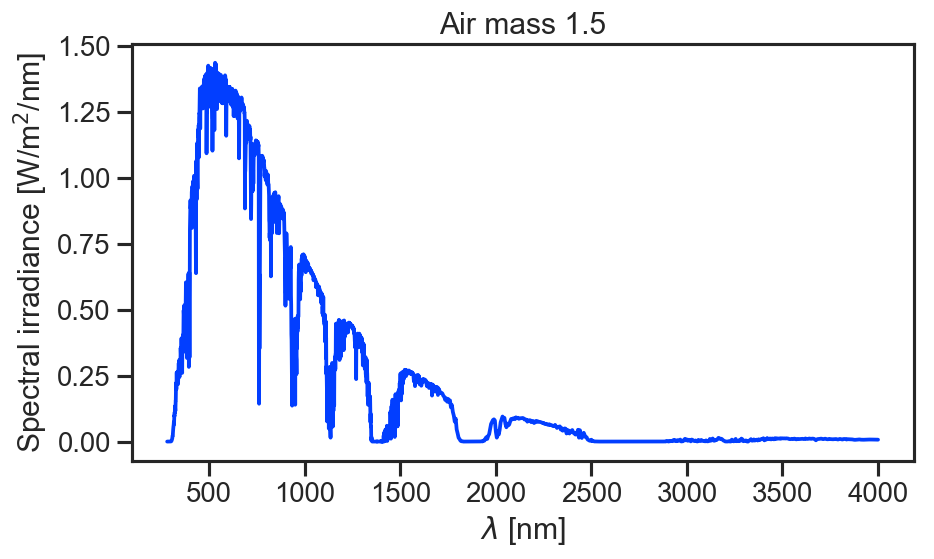

In [4]:
plot(lambdas, solar_irradiance)

xlabel('$\lambda$ [nm]')
ylabel('Spectral irradiance [W/m$^2$/nm]')
title('Air mass 1.5')
tight_layout()
show()

## Spectral irradiance

In [5]:
h = 6.626e-34 # [J.s]
c = 3e8 # [m/s]
d = 1e-2 # [m]

# bandpass filter
lambda_0 = 500 # [nm] --- centre wavelength
delta_lambda = 10 # [nm] --- FWHM

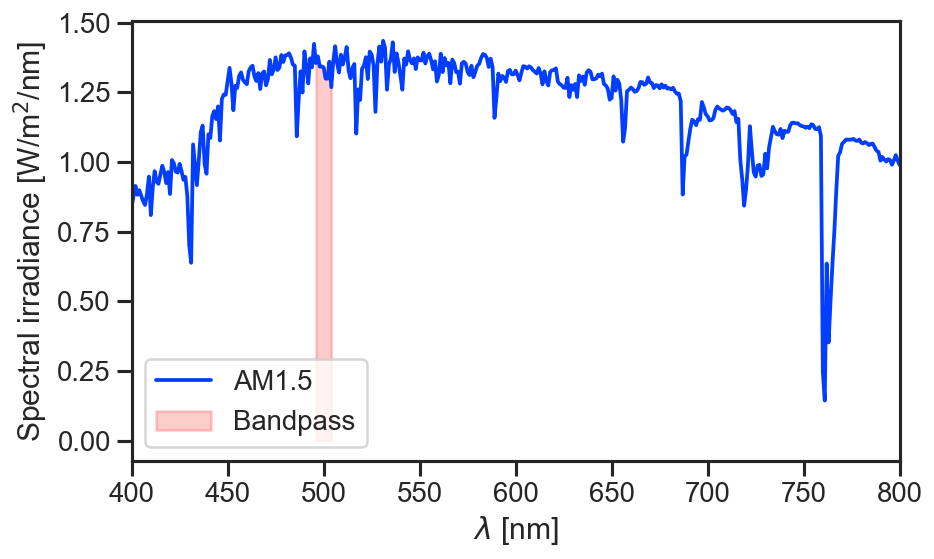

In [6]:
# only data within our bandpass
bandpass = \
    (lambdas > (lambda_0 - delta_lambda/2)) \
    & (lambdas < (lambda_0 + delta_lambda/2))

plot(lambdas, solar_irradiance, label='AM1.5')
fill_between(
    x=lambdas[bandpass], 
    y1=solar_irradiance[bandpass],  
    color='r', alpha=0.2, label='Bandpass'
)

xlim(400,800)
legend()
xlabel('$\lambda$ [nm]')
ylabel('Spectral irradiance [W/m$^2$/nm]')
tight_layout()
show()

## Solar photon rate

We want to know the overall solar spectral photon rate and the integrated rate within some spectral band.

\begin{align}
    \dot{N}(\lambda) &= \frac{\pi d^2}{4hc} I(\lambda) \lambda \\
    \dot{N}_{\Delta\lambda} &= \frac{\pi d^2}{4hc} 
    \int_{\lambda_0 - \frac{\Delta\lambda}{2}}^{\lambda_0 + \frac{\Delta\lambda}{2}} 
    I(\lambda) \lambda \partial\lambda 
\end{align}

In [7]:
solar_photon_rate = \
    ( (pi * d**2) / (4*h*c) ) \
    * (solar_irradiance * lambdas) # [Hz] vs wavelength

bandpass_photon_rate = trapz(
    solar_photon_rate[bandpass],
    lambdas[bandpass],
) # [Hz]

print('Photon rate: ~%.0e' % bandpass_photon_rate, 'Hz') # scientific notation

Photon rate: ~2e+24 Hz


## Solar photon rate ($\dot{N}(\lambda)$)

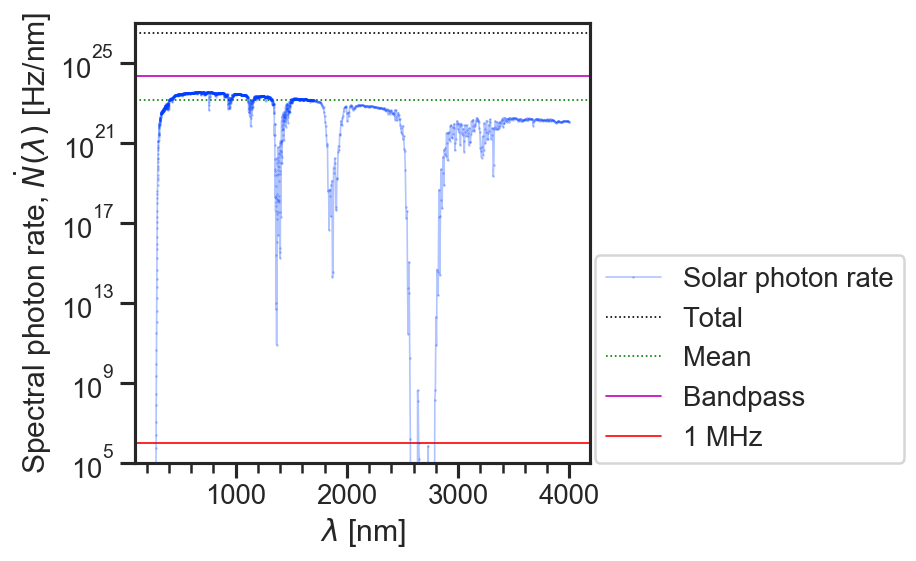

In [8]:
plot(lambdas, solar_photon_rate, 
     '.-', lw=1, ms=1, alpha=0.3, zorder=4,
     label='Solar photon rate')

axhline(trapz(solar_photon_rate, lambdas), 
        lw=1, ls=':', color='k', label='Total')
axhline(mean(solar_photon_rate), 
        lw=1, ls=':', color='g', label='Mean')
axhline(bandpass_photon_rate, 
        lw=1, color='m', label='Bandpass')
axhline(1e6, 
        lw=1, color='r', label='1 MHz')

yscale('log')
minorticks_on()
ylim(1e5,1e27)
legend(loc=[1.01,0])
xlabel('$\lambda$ [nm]')
ylabel('Spectral photon rate, $\dot{N}(\lambda)$ [Hz/nm]')
tight_layout()
show()

## Solar single photon source
It appears that there are two spectral bands where this could work --- DUV ($\lambda<300~{\rm nm}$) and IR ($\lambda \approx 2.6 \rightarrow 2.8~\mu{\rm m}$).

In [9]:
ssps_lambdas_DUV = lambdas[
    (solar_photon_rate <= 1e6)
    & (lambdas < 300)
]

ssps_lambdas_IR = lambdas[
    (solar_photon_rate <= 1e6)
    & (lambdas > 500)
]

print('Potential solar single photon source (SSPS) ranges:')
print(
    '\tDUV: <', ssps_lambdas_DUV[-1], 'nm'
)
print(
    '\tIR:', 
    ssps_lambdas_IR[0]/1e3, '---', ssps_lambdas_IR[-1]/1e3, 'um'
)

Potential solar single photon source (SSPS) ranges:
	DUV: < 284.0 nm
	IR: 2.575 --- 2.785 um


# Conclusions

* What photon rate ($\dot{N}$) do we see from solar irradiation?

> Total: $\dot{N} \approx 10^{26}$, typical: $\frac{\dot{N}}{\lambda} \approx 10^{22}/{\rm nm}$

* Is it possible to bandpass solar irradiation to such a degree to achieve similar specifications (i.e. $\dot{N} = 1~{\rm MHz} \equiv 1~{\rm photon / } \mu{\rm s}$) to a single photon source?

> Perhaps.
Spectral bands exist where the atmosphere is extremely opaque to solar radiation. 
Questions remain as to the _purity_ of these photons and their jitter (i.e. deterministic vs probabilistic sources).

* What is the best wavelength to do this at?

> $\lambda < 284~{\rm nm}$.  and $\lambda = 2.575 \rightarrow 2.785~\mu{\rm m}$. 